# Material and methods
**Study area**
This study was conducted at the Patrimoniales and Los Bloques residences on campus. A measurement point was identified in both residences where radon and temperature measurements were taken. Fifteen measurements were taken from 10 am to 12 am daily every hour at all residence hall measurement points. The average radon and temperature concentrations of each measurement point were calculated using the results of these measurements. Then, the average radon and temperature concentrations were determined by taking the average of fifteen different measurement points in the same residence. In other words, the radon and temperature concentrations in residence were calculated using the average of six measurements.
![](radon_image.jpg) 
![](thermometer.jpg)
**Experimental method**
It is important to consider the following characteristics:
* The place must be closed, and the radon meter must be static and approximately 50 cm above the ground and on the ground floor of the home.
* It must be 150 cm away from any ventilation. 
* It should not be exposed to sunlight, humidity, water, and dust. 

The equipment configuration used for this study was the measurement range of 3600s and the unit of measurement pCi/L. The measurement was made from 10:00 am to 00:00 am every hour. Subsequently, an excel file was created where we placed the measurements obtained, adding other characteristics such as temperature and a qualitative description of the climate.


# Results... so far

# Descriptive analysis of the project
This first part of the results shows an descriptive analysis of the data that was collected so far.
**Whole analysis:**
* some statistics
* scatter plot (radon vs hour; radon vs temperature)
* Covariance matrix

**Each house:**
* some statistics
* Boxplot
* scatter graph (radon vs hour; radon vs temperature)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler #escalating to aplly to the dataset

In [33]:
data = pd.read_csv('/home/alejandrodf1/Documents/radon_project/radon_project/data/raw/radon20.csv', sep=';')  #we get the data

In [34]:
#data = data['Temperatura (C)'].astype('float64')

In [35]:
data.head(20)

,Casa,house_code,hour,day,day_model,Hora,[]_RADON_(pCi/L),[]_RADON_(Bq/m3),effective_dose_[mSv/y],effective_dose_lung,20_hours_effective_dose_[mSv],Temperatura_(C),clima,age,ventilacion,time_period
0,pat 37,P-01,1,03/08/2022,1,10:00:00,0.70,25.90,0.44030,1.056720,0.459170,23.8,soleado,old,medium,morning
1,pat 37,P-01,2,03/08/2022,1,11:00:00,0.72,26.64,0.45288,1.086912,0.472289,23.8,soleado,old,medium,morning
2,pat 37,P-01,3,03/08/2022,1,12:00:00,0.67,24.79,0.42143,1.011432,0.439491,21.1,soleado,old,medium,afternoon
3,pat 37,P-01,4,03/08/2022,1,13:00:00,0.64,23.68,0.40256,0.966144,0.419813,21.2,Soleado,old,medium,afternoon
4,pat 37,P-01,5,03/08/2022,1,14:00:00,0.70,25.90,0.44030,1.056720,0.459170,21.3,Soleado,old,medium,afternoon
5,pat 37,P-01,6,03/08/2022,1,15:00:00,0.75,27.75,0.47175,1.132200,0.491968,21.4,Soleado,old,medium,afternoon
6,pat 37,P-01,7,03/08/2022,1,16:00:00,0.75,27.75,0.47175,1.132200,0.491968,21.5,soleado,old,medium,afternoon
7,pat 37,P-01,8,03/08/2022,1,17:00:00,0.67,24.79,0.42143,1.011432,0.439491,21.6,despejado,old,medium,afternoon
8,pat 37,P-01,9,03/08/2022,1,18:00:00,0.70,25.90,0.44030,1.056720,0.459170,21.7,Noche,old,medium,nigth
9,pat 37,P-01,10,03/08/2022,1,19:00:00,0.64,23.68,0.40256,0.966144,0.419813,21.7,Noche,old,medium,nigth


In [36]:
data.dtypes #check variable types

Casa                              object
house_code                        object
hour                               int64
day                               object
day_model                          int64
Hora                              object
[]_RADON_(pCi/L)                 float64
[]_RADON_(Bq/m3)                 float64
effective_dose_[mSv/y]           float64
effective_dose_lung              float64
20_hours_effective_dose_[mSv]    float64
Temperatura_(C)                  float64
clima                             object
age                               object
ventilacion                       object
time_period                       object
dtype: object

In [37]:
pd.DataFrame.describe(data)  #desciptive analysis whole dataset

,hour,day_model,[]_RADON_(pCi/L),[]_RADON_(Bq/m3),effective_dose_[mSv/y],effective_dose_lung,20_hours_effective_dose_[mSv],Temperatura_(C)
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,8.000000,2.044444,0.523370,19.364704,0.329200,0.790080,0.343309,22.458704
std,4.328517,0.816800,0.289956,10.728371,0.182382,0.437718,0.190199,0.845284
min,1.000000,1.000000,0.050000,1.850000,0.031450,0.075480,0.032798,20.600000
25%,4.000000,1.000000,0.270000,9.990000,0.169830,0.407592,0.177108,21.800000
50%,8.000000,2.000000,0.525000,19.425000,0.330225,0.792540,0.344377,22.500000
75%,12.000000,3.000000,0.750000,27.750000,0.471750,1.132200,0.491968,23.100000
max,15.000000,3.000000,1.290000,47.730000,0.811410,1.947384,0.846185,24.900000


In [38]:
data['[]_RADON_(Bq/m3)'].mean()

19.364703703703718

In [39]:
#!pip install opencv-python

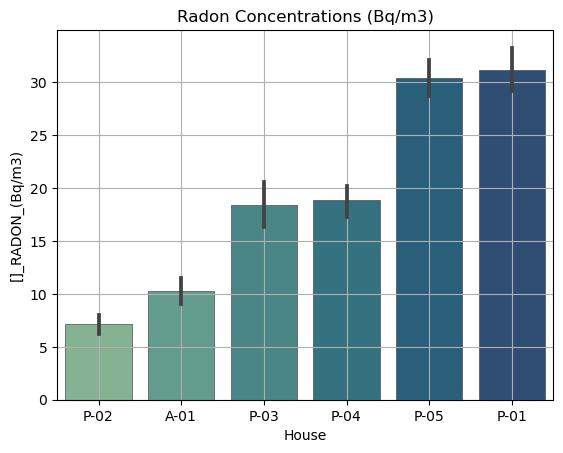

In [67]:
from turtle import color


order = data.groupby('house_code').mean().sort_values('[]_RADON_(Bq/m3)').index
sns.barplot(data=data,x= 'house_code', y='[]_RADON_(Bq/m3)',
            order=order,
            palette="crest",
            edgecolor=".3",
            linewidth=.5)

#sns.color_palette("magma", as_cmap=True)
sns.color_palette("viridis", as_cmap=True)
#sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)

plt.title('Radon Concentrations (Bq/m3)')
plt.xlabel('House')
plt.grid(True)
plt.savefig("radon_concentrations.png")
plt.show()


<AxesSubplot:xlabel='Temperatura_(C)', ylabel='[]_RADON_(Bq/m3)'>

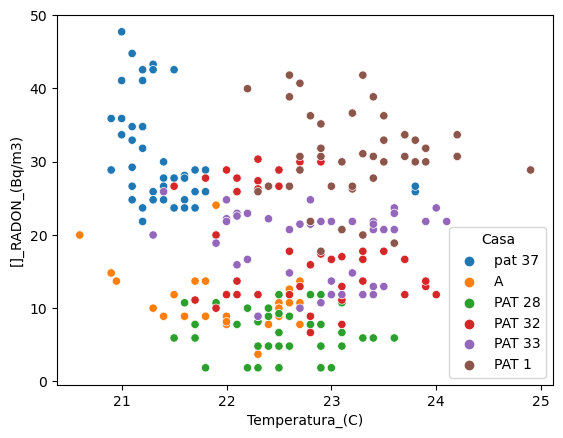

In [41]:
sns.scatterplot(data=data, x = 'Temperatura_(C)', y = '[]_RADON_(Bq/m3)',hue = 'Casa')

Boxplot 

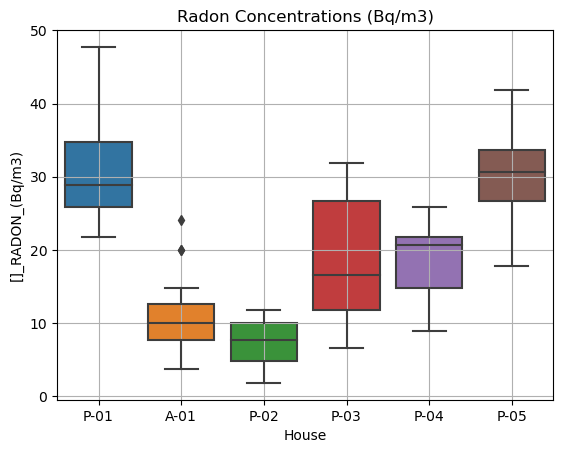

In [68]:
sns.color_palette("mako", as_cmap=True)
sns.boxplot(data=data, x='house_code', y='[]_RADON_(Bq/m3)')
plt.title('Radon Concentrations (Bq/m3)')
plt.xlabel('House')
plt.grid(True)
plt.savefig("radon_concentrations_boxplot.png")
plt.show()

<AxesSubplot:ylabel='Frequency'>

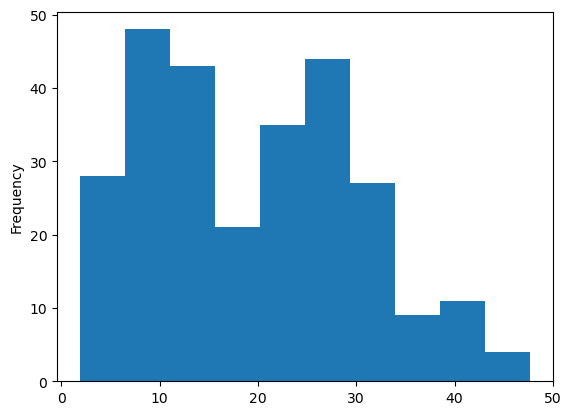

In [43]:
data['[]_RADON_(Bq/m3)'].plot.hist()

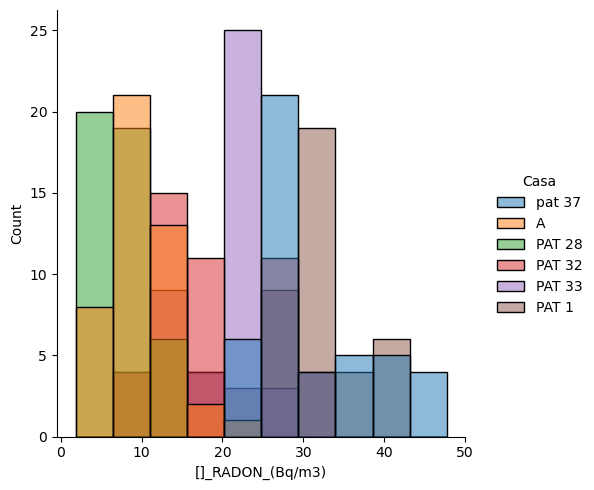

In [44]:
sns.displot(data, x = '[]_RADON_(Bq/m3)', hue = 'Casa')

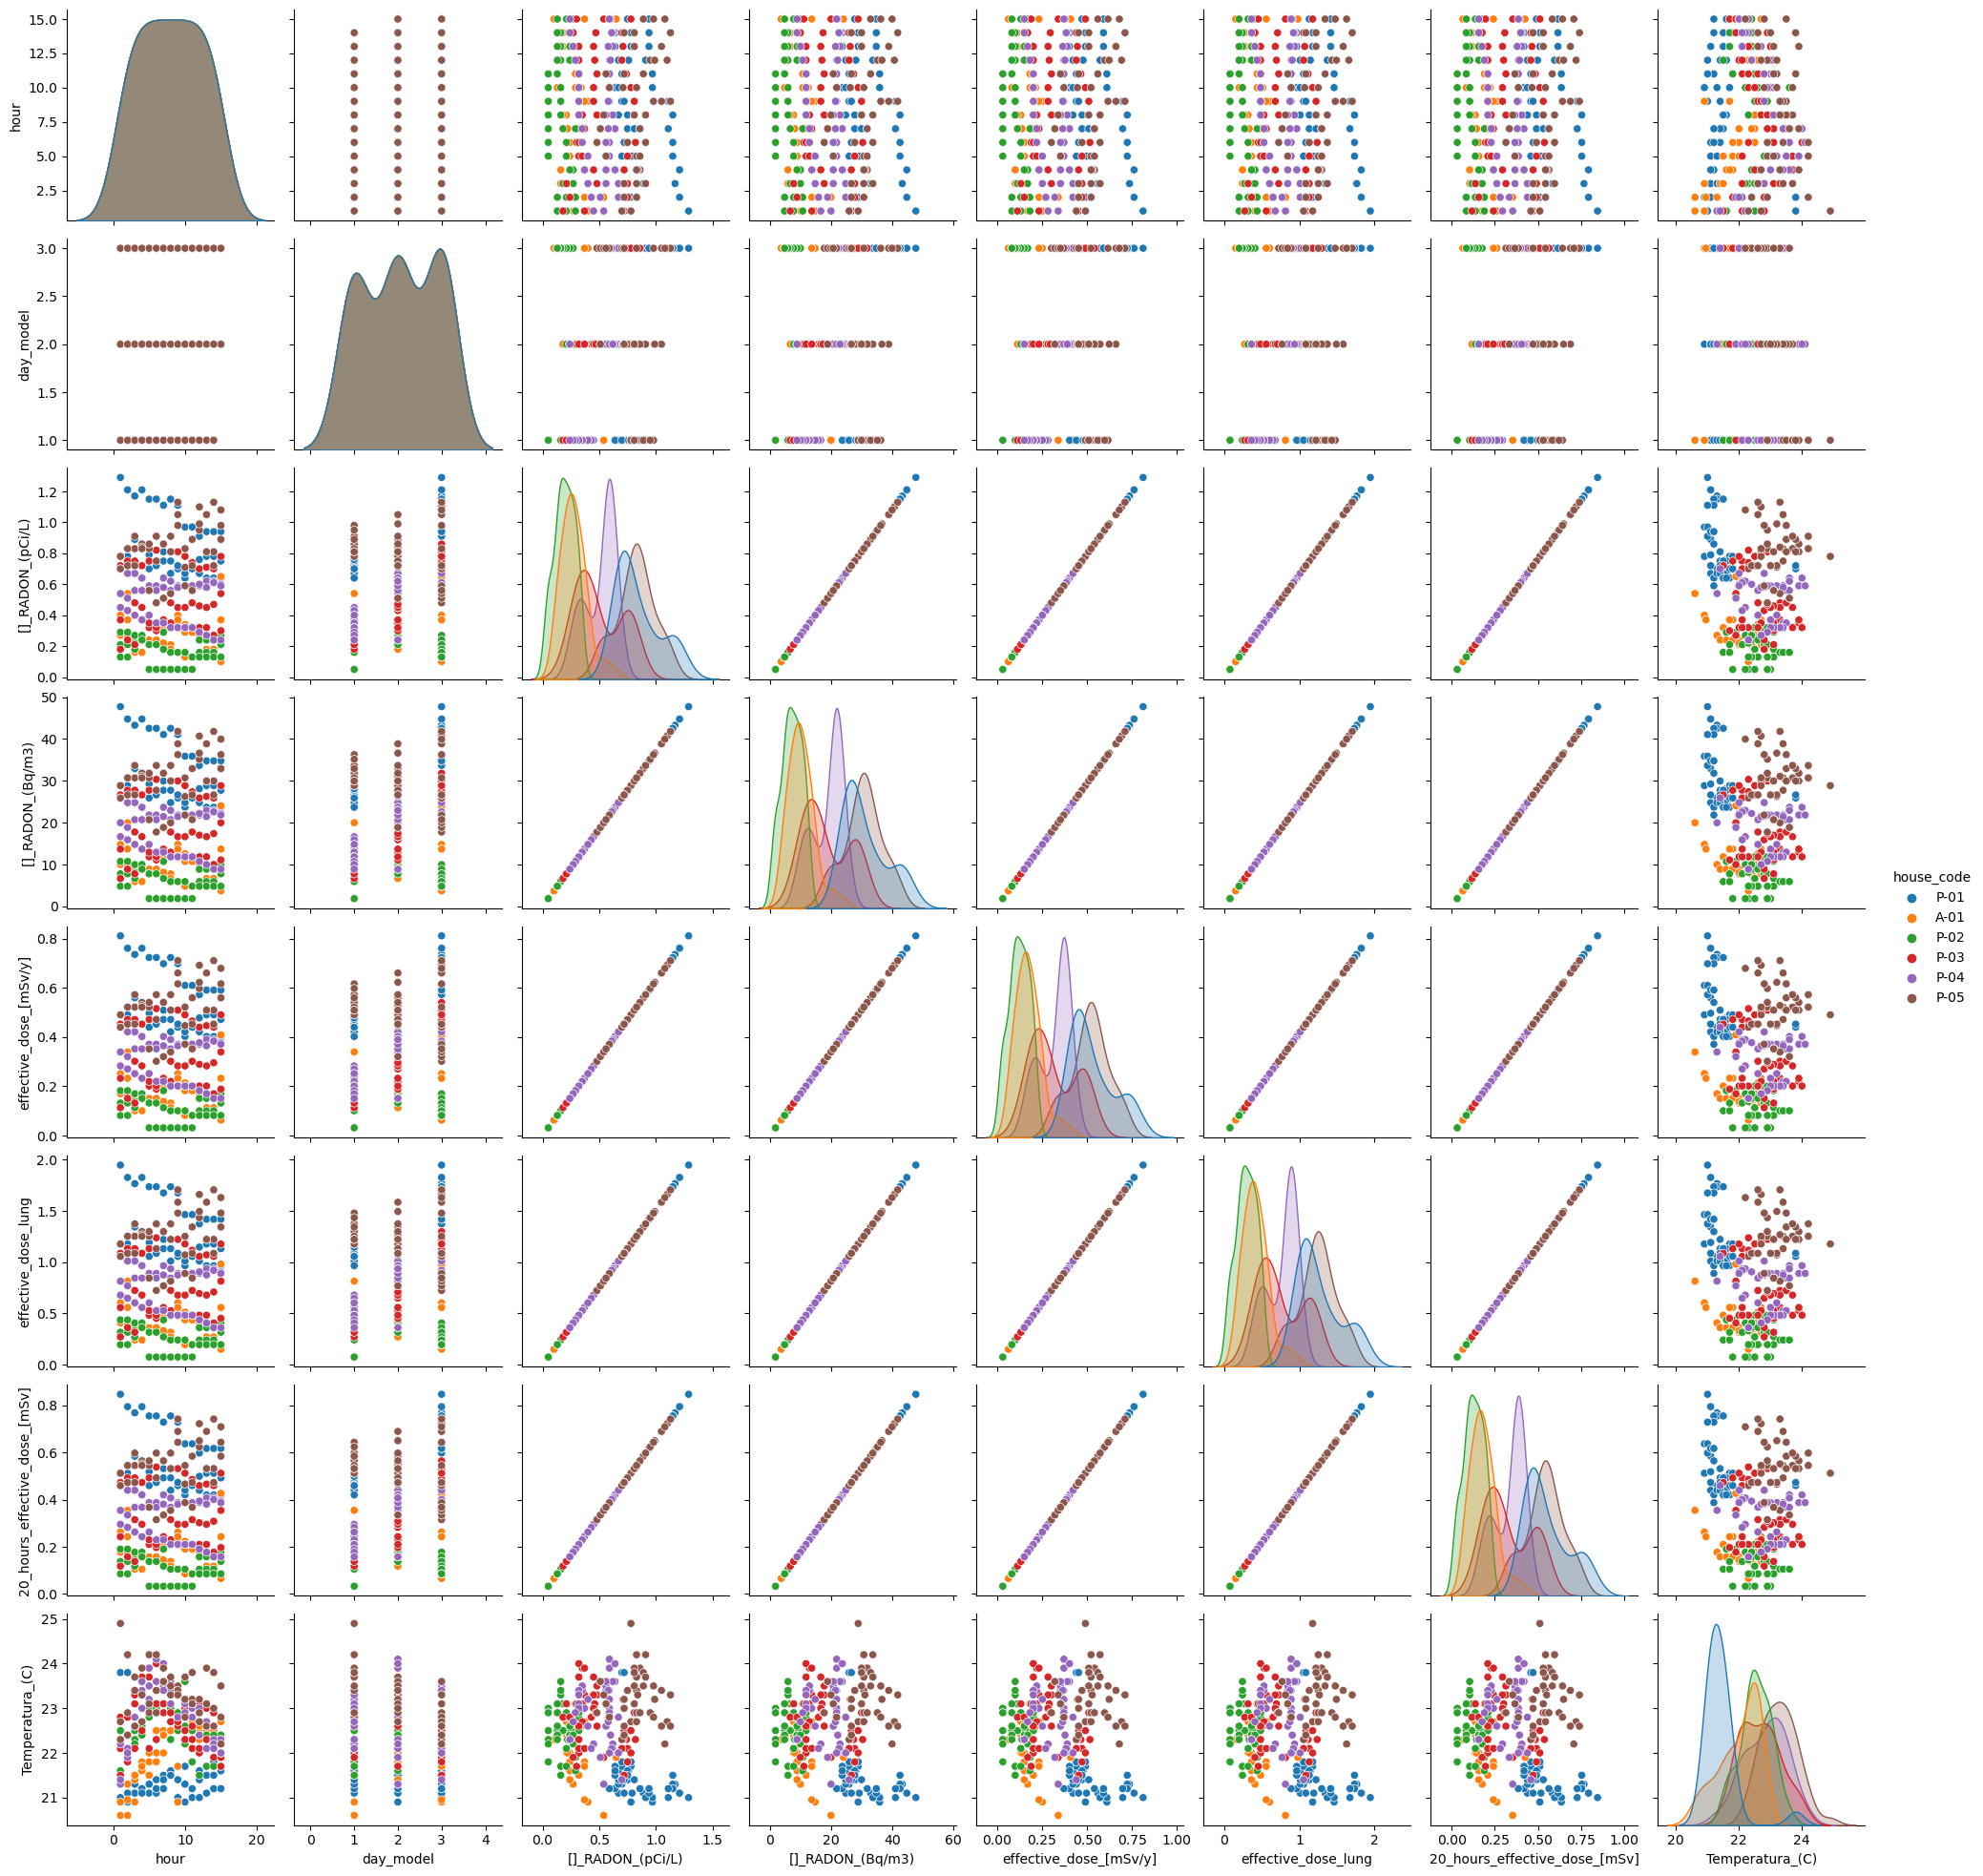

In [45]:
sns.pairplot(data, hue = 'house_code') #this allow us to see a graph of the relation but does not work when we have a lot of variables


# Each house analysis
This part analyze how is the radon concentration behaviour in each measured house.

## Pat 37

This results corresponds to Pat 37

In [46]:
pat_37 = data[(data['Casa']=='pat 37')]
pat_37 = pd.DataFrame(pat_37)
#pat_37
#print(pd.DataFrame.describe(pat_37))

In [47]:
print(pd.DataFrame.describe(pat_37))

            hour  day_model  []_RADON_(pCi/L)  []_RADON_(Bq/m3)  \
count  45.000000  45.000000         45.000000         45.000000   
mean    8.000000   2.044444          0.841778         31.145778   
std     4.369314   0.824499          0.193476          7.158628   
min     1.000000   1.000000          0.590000         21.830000   
25%     4.000000   1.000000          0.700000         25.900000   
50%     8.000000   2.000000          0.780000         28.860000   
75%    12.000000   3.000000          0.940000         34.780000   
max    15.000000   3.000000          1.290000         47.730000   

       effective_dose_[mSv/y]  effective_dose_lung  \
count               45.000000            45.000000   
mean                 0.529478             1.270748   
std                  0.121697             0.292072   
min                  0.371110             0.890664   
25%                  0.440300             1.056720   
50%                  0.490620             1.177488   
75%               

In [48]:
sns.displot(data[(data['Casa']=='pat 37')], x= '[] RADON (Bq/m3)')
plt.show()

ValueError: Could not interpret value `[] RADON (Bq/m3)` for parameter `x`

<AxesSubplot:xlabel='hour', ylabel='[] RADON (Bq/m3)'>

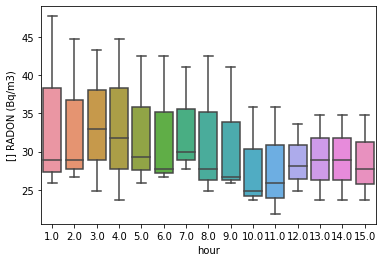

In [ ]:
sns.boxplot(data=data[(data['Casa']=='pat 37')], x='hour', y='[] RADON (Bq/m3)')

<AxesSubplot:xlabel='hour', ylabel='[] RADON (Bq/m3)'>

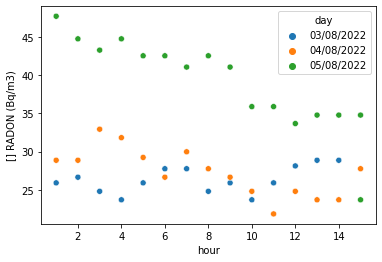

In [ ]:
sns.scatterplot(data=pat_37, x = 'hour', y = '[] RADON (Bq/m3)',hue = 'day')

<AxesSubplot:xlabel='Temperatura (C)', ylabel='[] RADON (Bq/m3)'>

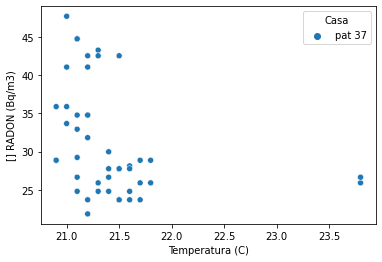

In [ ]:
sns.scatterplot(data=pat_37, x = 'Temperatura (C)', y = '[] RADON (Bq/m3)',hue = 'Casa')

## Bloque A

This results corresponds to bloque A

            hour  day_model  []_RADON_(pCi/L)  []_RADON_(Bq/m3)  \
count  45.000000  45.000000         45.000000         45.000000   
mean    8.000000   2.044444          0.276889         10.244889   
std     4.369314   0.824499          0.116264          4.301777   
min     1.000000   1.000000          0.100000          3.700000   
25%     4.000000   1.000000          0.210000          7.770000   
50%     8.000000   2.000000          0.270000          9.990000   
75%    12.000000   3.000000          0.340000         12.580000   
max    15.000000   3.000000          0.650000         24.050000   

       effective_dose_[mSv/y]  effective_dose_lung  \
count               45.000000            45.000000   
mean                 0.174163             0.417991   
std                  0.073130             0.175512   
min                  0.062900             0.150960   
25%                  0.132090             0.317016   
50%                  0.169830             0.407592   
75%               

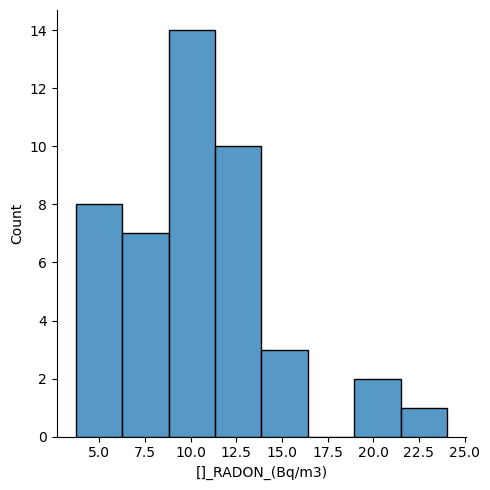

In [ ]:
bloque_A4 = data[(data['Casa']=='A')]
print(pd.DataFrame.describe(bloque_A4))
#bloque_A4
sns.displot(bloque_A4, x= '[]_RADON_(Bq/m3)')

<AxesSubplot:xlabel='hour', ylabel='[] RADON (Bq/m3)'>

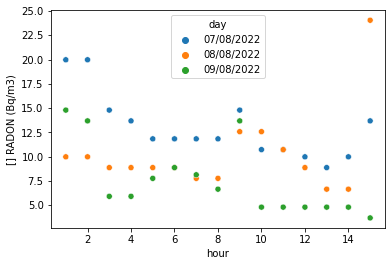

In [ ]:
sns.scatterplot(data=bloque_A4, x = 'hour', y = '[] RADON (Bq/m3)',hue = 'day')

<AxesSubplot:xlabel='Temperatura (C)', ylabel='[] RADON (Bq/m3)'>

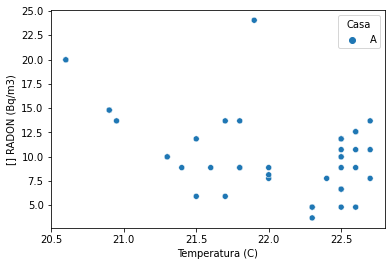

In [ ]:
sns.scatterplot(data=bloque_A4, x = 'Temperatura (C)', y = '[] RADON (Bq/m3)',hue = 'Casa')

<AxesSubplot:xlabel='hour', ylabel='[] RADON (Bq/m3)'>

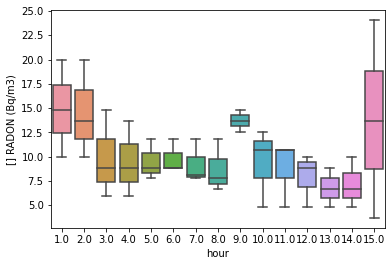

In [ ]:
sns.boxplot(data=bloque_A4, x='hour', y='[] RADON (Bq/m3)')

## Pat 28

This results corresponds to Pat 28

            hour  day_model  []_RADON_(pCi/L)  []_RADON_(Bq/m3)  \
count  45.000000  45.000000         45.000000         45.000000   
mean    8.000000   2.044444          0.192444          7.120444   
std     4.369314   0.824499          0.087234          3.227664   
min     1.000000   1.000000          0.050000          1.850000   
25%     4.000000   1.000000          0.130000          4.810000   
50%     8.000000   2.000000          0.210000          7.770000   
75%    12.000000   3.000000          0.270000          9.990000   
max    15.000000   3.000000          0.320000         11.840000   

       effective_dose_[mSv/y]  effective_dose_lung  \
count               45.000000            45.000000   
mean                 0.121048             0.290514   
std                  0.054870             0.131689   
min                  0.031450             0.075480   
25%                  0.081770             0.196248   
50%                  0.132090             0.317016   
75%               

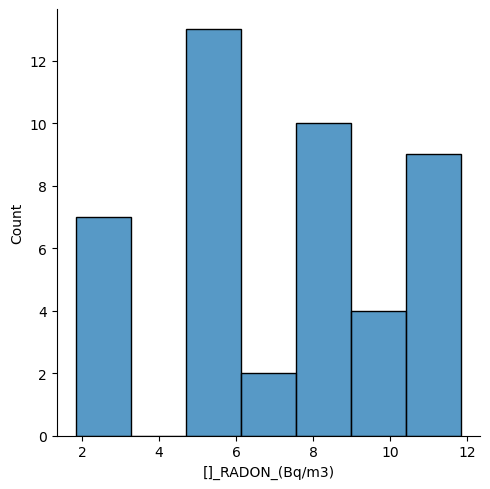

In [ ]:
pat_28 = data[(data['Casa']=='PAT 28')]
print(pd.DataFrame.describe(pat_28))
#pat_28
sns.displot(pat_28, x= '[]_RADON_(Bq/m3)')

<AxesSubplot:xlabel='hour', ylabel='[] RADON (Bq/m3)'>

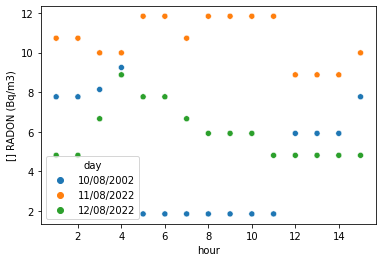

In [ ]:
sns.scatterplot(data=pat_28, x = 'hour', y = '[] RADON (Bq/m3)',hue = 'day')

<AxesSubplot:xlabel='Temperatura (C)', ylabel='[] RADON (Bq/m3)'>

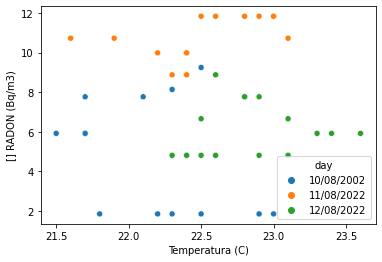

In [ ]:
sns.scatterplot(data=pat_28, x = 'Temperatura (C)', y = '[] RADON (Bq/m3)',hue = 'day')

<AxesSubplot:xlabel='hour', ylabel='[] RADON (Bq/m3)'>

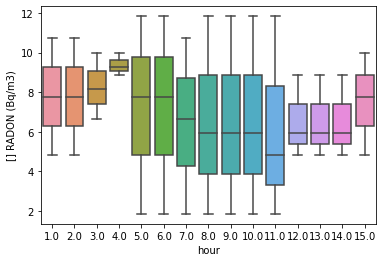

In [ ]:
sns.boxplot(data=pat_28, x='hour', y='[] RADON (Bq/m3)')

## Pat 32

This results corresponds to Pat 32

            hour  day_model  []_RADON_(pCi/L)  []_RADON_(Bq/m3)  \
count  45.000000  45.000000         45.000000         45.000000   
mean    8.000000   2.044444          0.498667         18.450667   
std     4.369314   0.824499          0.202211          7.481789   
min     1.000000   1.000000          0.180000          6.660000   
25%     4.000000   1.000000          0.320000         11.840000   
50%     8.000000   2.000000          0.450000         16.650000   
75%    12.000000   3.000000          0.720000         26.640000   
max    15.000000   3.000000          0.860000         31.820000   

       effective_dose_[mSv/y]  effective_dose_lung  \
count               45.000000            45.000000   
mean                 0.313661             0.752787   
std                  0.127190             0.305257   
min                  0.113220             0.271728   
25%                  0.201280             0.483072   
50%                  0.283050             0.679320   
75%               

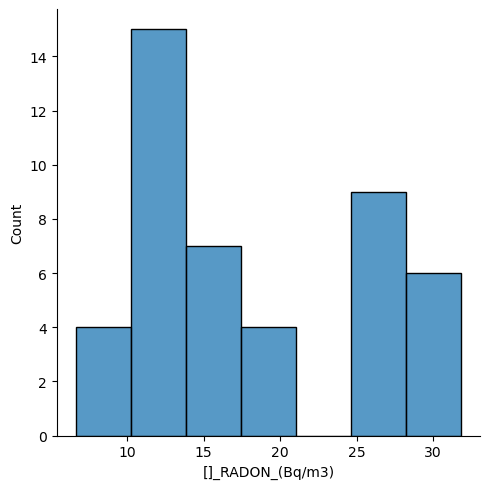

In [ ]:
pat_32 = data[(data['Casa']=='PAT 32')]
print(pd.DataFrame.describe(pat_32))
#pat_32
sns.displot(pat_32, x= '[]_RADON_(Bq/m3)')

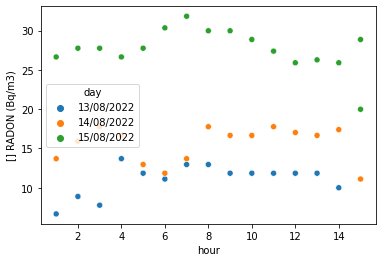

In [ ]:
sns.scatterplot(data=pat_32, x = 'hour', y = '[] RADON (Bq/m3)',hue = 'day')
plt.show()

<AxesSubplot:xlabel='house code', ylabel='[] RADON (Bq/m3)'>

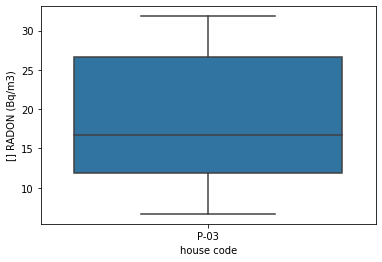

In [ ]:
sns.boxplot(data=pat_32, x='hour', y='[] RADON (Bq/m3)')

In [ ]:
fig = px.scatter(df_mean, x=df_mean.index, y="NPN1", error_y=h)
fig.update_layout(layout, title_text='Mean NPN1 by site with 95% confidence intervals', width=600, height=400)
fig.update_traces(marker_color='black')
fig.update_xaxes(type='category')
py.plot(fig, filename='jmp-confidence intervals')
fig.show()

NameError: name 'px' is not defined

## Pat 33

This results corresponds to Pat 33

In [ ]:
pat_33 = data[(data['Casa']=='PAT 33')]
print(pd.DataFrame.describe(pat_33))
#pat_33
sns.displot(pat_33, x= '[]_RADON_(Bq/m3)')

            hour  day_model  []_RADON_(pCi/L)  []_RADON_(Bq/m3)  \
count  45.000000  45.000000         45.000000         45.000000   
mean    8.000000   2.044444          0.509556         18.853556   
std     4.369314   0.824499          0.131994          4.883793   
min     1.000000   1.000000          0.240000          8.880000   
25%     4.000000   1.000000          0.400000         14.800000   
50%     8.000000   2.000000          0.560000         20.720000   
75%    12.000000   3.000000          0.590000         21.830000   
max    15.000000   3.000000          0.700000         25.900000   

       effective_dose_[mSv/y]  effective_dose_lung  \
count               45.000000            45.000000   
mean                 0.320510             0.769225   
std                  0.083024             0.199259   
min                  0.150960             0.362304   
25%                  0.251600             0.603840   
50%                  0.352240             0.845376   
75%               

ValueError: Could not interpret value `[] RADON (Bq/m3)` for parameter `x`

<AxesSubplot:xlabel='hour', ylabel='[] RADON (Bq/m3)'>

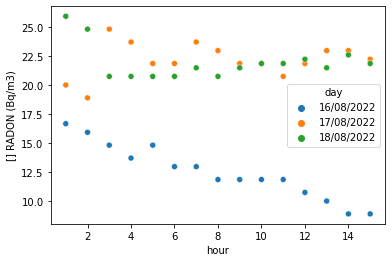

In [ ]:
sns.scatterplot(data=pat_33, x = 'hour', y = '[] RADON (Bq/m3)',hue = 'day')

<AxesSubplot:xlabel='hour', ylabel='[] RADON (Bq/m3)'>

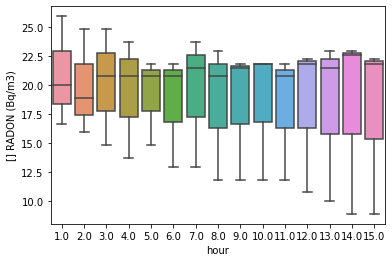

In [ ]:
sns.boxplot(data=pat_33, x='hour', y='[] RADON (Bq/m3)')

# Pat 1

            hour  day_model  []_RADON_(pCi/L)  []_RADON_(Bq/m3)  \
count  45.000000  45.000000         45.000000         45.000000   
mean    8.000000   2.044444          0.820889         30.372889   
std     4.369314   0.824499          0.167207          6.186670   
min     1.000000   1.000000          0.480000         17.760000   
25%     4.000000   1.000000          0.720000         26.640000   
50%     8.000000   2.000000          0.830000         30.710000   
75%    12.000000   3.000000          0.910000         33.670000   
max    15.000000   3.000000          1.130000         41.810000   

       effective_dose_[mSv/y]  effective_dose_lung  \
count               45.000000            45.000000   
mean                 0.516339             1.239214   
std                  0.105173             0.252416   
min                  0.301920             0.724608   
25%                  0.452880             1.086912   
50%                  0.522070             1.252968   
75%               

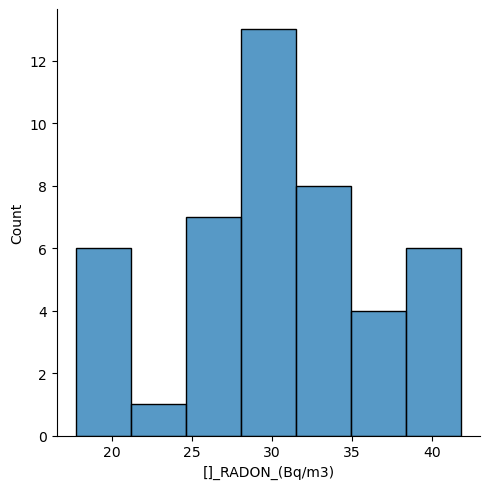

In [ ]:
pat_1 = data[(data['Casa']=='PAT 1')]
print(pd.DataFrame.describe(pat_1))
#pat_1
sns.displot(pat_1, x= '[]_RADON_(Bq/m3)')

# Covariance Matrix

The following will find if there is any relationship between the measure variables.

In [ ]:
#scaler = StandardScaler()   #scalator in order to normalize the data
#scaled = scaler.fit_transform(
#    data[['[] RADON (Bq/m3)', 'Temperatura (C)', 'hour']] #Im not interest in categorical data so i eliminate species
#)

In [ ]:
#covariance_matrix = np.cov(scaled.T)
#covariance_matrix

In [ ]:
#plt.figure(figsize=(10,10))
#sns.set(font_scale=1.5)
#hm = sns.heatmap(covariance_matrix,
#                 cbar=True,
#                 annot=True,
#                 square=True,
#                 fmt='.2f',
#                 annot_kws={'size': 12},
#                 yticklabels=['[] RADON (Bq/m3)','Temperatura (C)','hour'],
#                 xticklabels=['[] RADON (Bq/m3)','Temperatura (C)','hour'])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b910699a-73d1-46df-b36d-6025a31c953f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>